In [ ]:
#%pip install tensorflow==2.11.*

In [ ]:
#%pip install -q -U keras-tuner

In [28]:
#compatibility check
import sys
print(sys.version)
import pip
print(pip.__version__)

3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]
22.3.1


In [29]:
#necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

from datetime import datetime

In [30]:
#assert library import
assert pd.__version__ >= '1.0.0'
assert np.__version__ >= '1.0.0'
assert tf.__version__ >= '2.0.0'
assert plt
assert Sequential
assert Dense
assert Dropout
assert BatchNormalization
assert Adam
assert l2
assert train_test_split
assert LabelEncoder
assert kt
assert tf.__version__ >= "2.0.0"

In [31]:
#read csv
df = pd.read_csv('cleaned_data_final.csv')


In [32]:
#turn labels to 0 and 1s
df['radiant_win'] = df['radiant_win'].replace({True: 1, False: 0})


Logistic Regression implemented with Keras

In [8]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 4:], df[['radiant_win']], test_size=0.2, random_state=42)

In [9]:
#convert numpy arrays of training to tensors, set to tf.float32
X_train_tensor = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

2023-03-20 06:00:17.622645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
#hyperparameter tuning dictionary that will be searched on
params = {
    'learning_rate': [0.001, 0.01, 1.0],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'regularization_strength': [0.01, 0.1]
}

In [35]:
#function to create logistic regression model:
def create_model(learning_rate=0.01, activation='relu', regularization_strength=0.01):
    model = Sequential()
    model.add(Dense(1, activation='sigmoid', input_shape=(246,), kernel_regularizer=l2(regularization_strength)))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
#Wrapper
model = KerasClassifier(build_fn = create_model, verbose=0)



/var/folders/zr/l3b0jnnd4rs2n6yf0p7__f500000gn/T/ipykernel_69649/87003808.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose=0)


In [37]:
search= RandomizedSearchCV(estimator= model, param_distributions= params, cv=3, verbose=3)
search_result= search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END activation=tanh, learning_rate=0.01, regularization_strength=0.1;, score=0.502 total time=   2.5s
[CV 2/3] END activation=tanh, learning_rate=0.01, regularization_strength=0.1;, score=0.509 total time=   2.3s
[CV 3/3] END activation=tanh, learning_rate=0.01, regularization_strength=0.1;, score=0.507 total time=   2.4s
[CV 1/3] END activation=relu, learning_rate=0.01, regularization_strength=0.01;, score=0.543 total time=   2.5s
[CV 2/3] END activation=relu, learning_rate=0.01, regularization_strength=0.01;, score=0.538 total time=   2.4s
[CV 3/3] END activation=relu, learning_rate=0.01, regularization_strength=0.01;, score=0.533 total time=   2.6s
[CV 1/3] END activation=relu, learning_rate=1.0, regularization_strength=0.1;, score=0.504 total time=   2.5s
[CV 2/3] END activation=relu, learning_rate=1.0, regularization_strength=0.1;, score=0.514 total time=   2.4s
[CV 3/3] END activation=relu, learning_rate=1.0, r

In [38]:
print(search_result.best_params_)

{'regularization_strength': 0.01, 'learning_rate': 0.001, 'activation': 'sigmoid'}


In [39]:
#get best hyperparaeters
best_params = search_result.best_params_
#train LR with best parameters
model = create_model(learning_rate=best_params['learning_rate'],
                     activation=best_params['activation'], 
                     regularization_strength=best_params['regularization_strength'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
2290/2290 [==============================] - 3s 1ms/step - loss: 0.6935 - accuracy: 0.5395 - val_loss: 0.6897 - val_accuracy: 0.5507
Epoch 2/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5521 - val_loss: 0.6899 - val_accuracy: 0.5538
Epoch 3/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5524 - val_loss: 0.6900 - val_accuracy: 0.5530
Epoch 4/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5528 - val_loss: 0.6901 - val_accuracy: 0.5534
Epoch 5/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5533 - val_loss: 0.6902 - val_accuracy: 0.5475
Epoch 6/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5525 - val_loss: 0.6899 - val_accuracy: 0.5519
Epoch 7/100
2290/2290 [==============================] - 2s 1ms/step - loss: 0.6898 - accuracy: 0.5527 - val_loss: 0.6900 - val_ac

In [24]:
#evaluate test accuracy
test_loss, test_acc = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

573/573 [==============================] - 1s 772us/step - loss: 0.6903 - accuracy: 0.5475
Test Loss: 0.6903
Test Accuracy: 0.5475


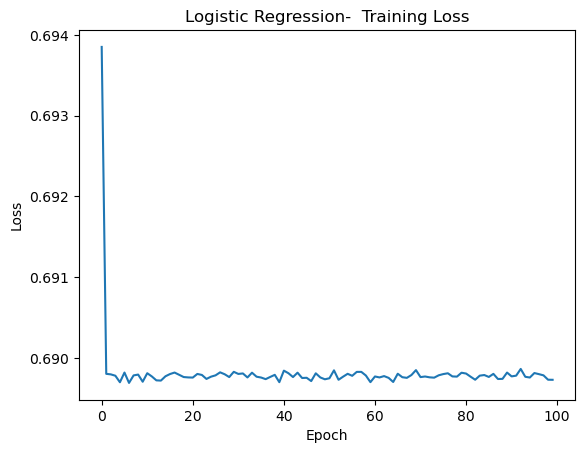

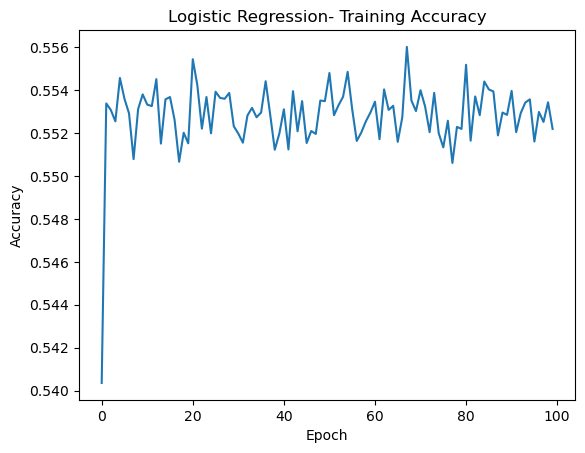

In [25]:
#training loss plot
plt.plot(history.history['loss'])
plt.title('Logistic Regression-  Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#training accuracy plot
plt.plot(history.history['accuracy'])
plt.title('Logistic Regression- Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()